In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


### Download data

In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

In [3]:
print('Total training data:', training_images.shape[0])
print('Total testing data:', testing_images.shape[0])

Total training data: 60000
Total testing data: 10000


### Visualize data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

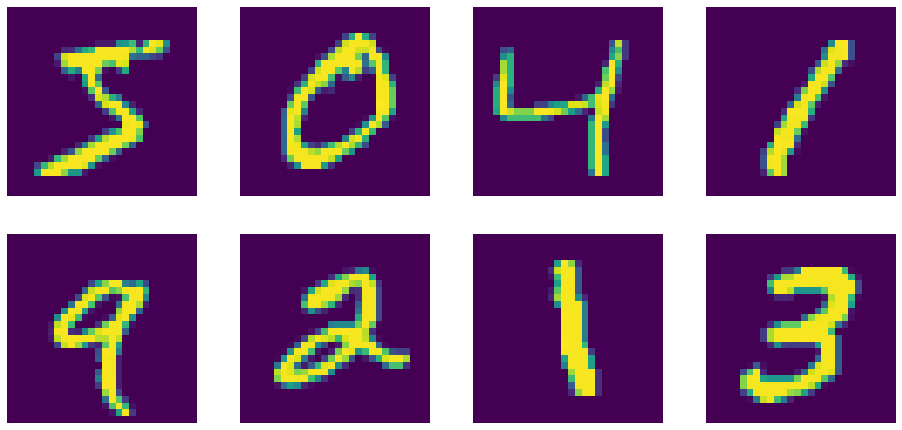

In [5]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, ncols*4)

pic_index += 8

digits = training_images[pic_index-8:pic_index]

for i, digit in enumerate(digits):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.axis('Off')
    
    plt.imshow(digit)
plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

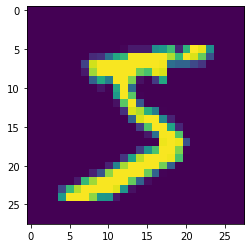

In [6]:
print(training_images[0])
print(training_labels[0])
plt.imshow(training_images[0])

### Normalize data

In [7]:
training_images = training_images/255.0
testing_images = testing_images/255.0

### Define Callback function

In [8]:
class Callback_(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] > 0.99:
            print('Reached 99% accuracy. Stopping the training')
            self.model.stop_training = True

### Define and compile model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [10]:
callbacks = Callback_()

### Train model

In [11]:
history = model.fit(
        training_images,
        training_labels,
        epochs=10,
        validation_data=(testing_images, testing_labels),
        callbacks=[callbacks]
    )

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5143 - accuracy: 0.8538 - val_loss: 0.1880 - val_accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1612 - accuracy: 0.9520 - val_loss: 0.1301 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.1146 - accuracy: 0.9655 - val_loss: 0.1035 - val_accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.0856 - accuracy: 0.9747 - val_loss: 0.1032 - val_accuracy: 0.9690
Epoch 5/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.0704 - accuracy: 0.9792 - val_loss: 0.0941 - val_accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0910 - val_accuracy: 0.9726
Epoch 7/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0876 - val

### Visualize accuracy and loss

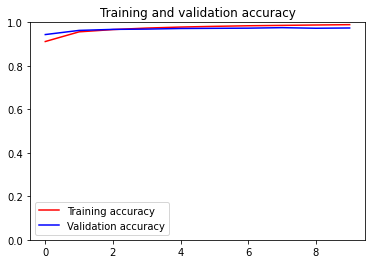

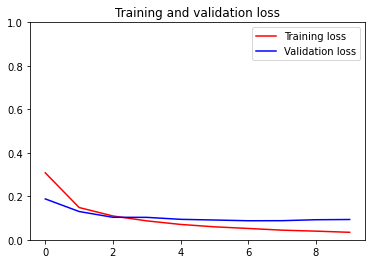

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim([0,1])
plt.legend(loc=0)
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0,1])
plt.legend(loc=0)
plt.show()